In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [5]:
baseline_K_val = [1, 4, 7, 10]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject="Brian")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Brian/Baseline_results_train_with_{K}data_B.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/14 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
(8532, 4, 14, 1) (8532,) (86, 4, 14, 1) (86,)
Dataset 2/14 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
second (8532, 4, 14, 1) (8532,) (86, 4, 14, 1) (86,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 83.17%
Maximum validation accuracy : 82.56%
Accuracy of test dataset using model V0: 82.5581%
Dataset 3/14 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 82.9755%
Dataset 4/14 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.3503%
Dataset 5/14 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 86.2065%
Dataset 6/14 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.5585%
Dataset 7/14 - Session Exp_2025-07-16-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 79.2517%
Dataset 8/14 - Session Exp_2025-07-16-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 82.0300%
Dataset 9/14 - Session Exp_2025-07-17-v1/E9AD0

In [10]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '11']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Brian/Baseline_results_train_with_{K}data_B.csv')

SUBJECT = "Brian"

In [7]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)


Dataset 1/14 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 81.39%
Maximum validation accuracy : 81.64%

Dataset 2/14 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.81%
Maximum validation accuracy : 89.81%

Dataset 3/14 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 91.6%
Maximum validation accuracy : 93.18%

Dataset 4/14 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 89.63%
Maximum validation accuracy : 91.97%

Dataset 5/14 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 94.02%
Maximum validation

In [8]:
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_Brian/Train_Test_per_sessions.csv', index=False)

In [11]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 28.57%
Average of acc using previous test data after training: 82.68%
Average of acc using current test data after training: 92.70%
K-1: 83.15% | Target: 93.55
K-4: 84.33% | Target: 94.11
K-7: 92.48% | Target: 94.35
K-11: 93.86% | Target: 94.32


In [22]:
np.array(baseline_result['Info'])

array(['Stand (6/27)', 'Sit_chair (6/27)', 'Stand (7/9)',
       'Sit_chair (7/9)', 'Stand (7/10)', 'Sit_chair (7/10)',
       'Stand (7/16)', 'Sit_chair (7/16)', 'Stand (7/17)',
       'Sit_chair (7/17)', 'Stand (7/24)', 'Sit_chair (7/24)',
       'Stand (8/1)', 'Sit_chair (8/1)'], dtype=object)

In [20]:
Trained_acc_all

[0.8164307475090027,
 0.8981158137321472,
 0.9317707419395447,
 0.9197402000427246,
 0.953201413154602,
 0.9195082187652588,
 0.9342504143714905,
 0.9589388966560364,
 0.9300325512886047,
 0.9580143690109253,
 0.9277443289756775,
 0.9492315053939819,
 0.9557563066482544,
 0.924593985080719]

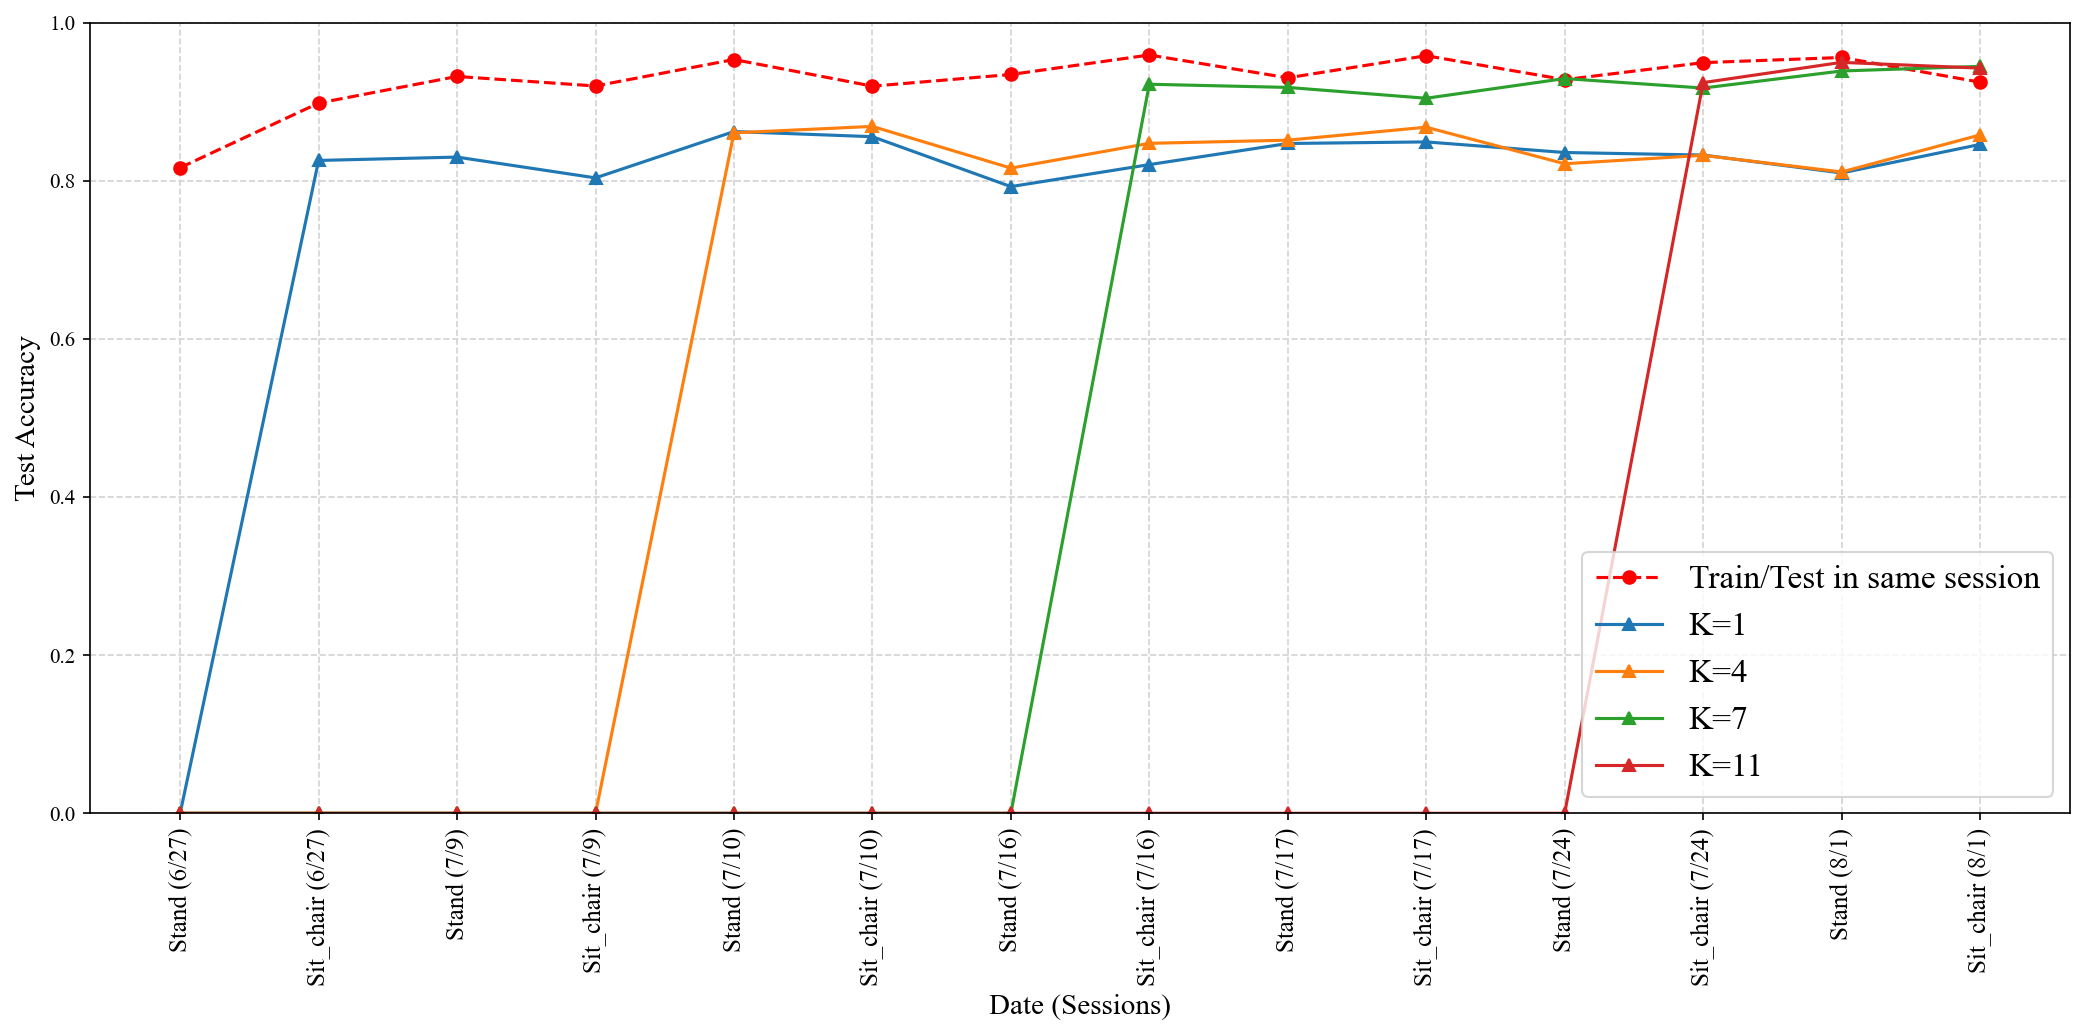

In [21]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.8164307475090027, 0.8981158137321472, 0.9317707419395447, 0.9197402000427246, 0.953201413154602, 0.9195082187652588, 0.9342504143714905, 0.9589388966560364, 0.9300325512886047, 0.9580143690109253, 0.9277443289756775, 0.9492315053939819, 0.9557563066482544, 0.924593985080719]

X_labels = ['Stand (6/27)', 'Sit_chair (6/27)', 'Stand (7/9)', 'Sit_chair (7/9)', 'Stand (7/10)', 'Sit_chair (7/10)',
            'Stand (7/16)', 'Sit_chair (7/16)', 'Stand (7/17)', 'Sit_chair (7/17)', 'Stand (7/24)', 'Sit_chair (7/24)', 'Stand (8/1)', 'Sit_chair (8/1)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1, loc='lower right')
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()